# Healthcare Weight Prediction using Linear Regression (Kaggle Gym Dataset)

## Import libraries and Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset")

print("Path to dataset files:", path)

100%|██████████| 21.6k/21.6k [00:00<00:00, 22.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1


In [4]:
!ls /root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1/
!mv /root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1/gym_members_exercise_tracking.csv /content/sample_data/gym_members.csv

gym_members_exercise_tracking.csv


In [7]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
# Step 2: Load Dataset
df = pd.read_csv("gym_members.csv")  # Change the filename as needed

## Data Inspection and Preprocessing

In [9]:
# Step 3: Data Inspection
print("First 5 rows:")
print(df.head())
print("\nSummary:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

First 5 rows:
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0

In [10]:
# Step 4: Data Preprocessing
df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['Gender', 'Workout_Type'], drop_first=True)
features = ['Height (m)', 'Age', 'Experience_Level', 'Session_Duration (hours)',
            'Workout_Frequency (days/week)', 'Calories_Burned', 'Avg_BPM', 'Gender_Male']
features = [f for f in features if f in df.columns]
X = df[features]
y = df['Weight (kg)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Linear Regression Model

In [11]:
# Step 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Make Predictions and Evaluate. Mean Squared Error (MSE)

In [12]:
# Step 6: Make Predictions and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 304.23


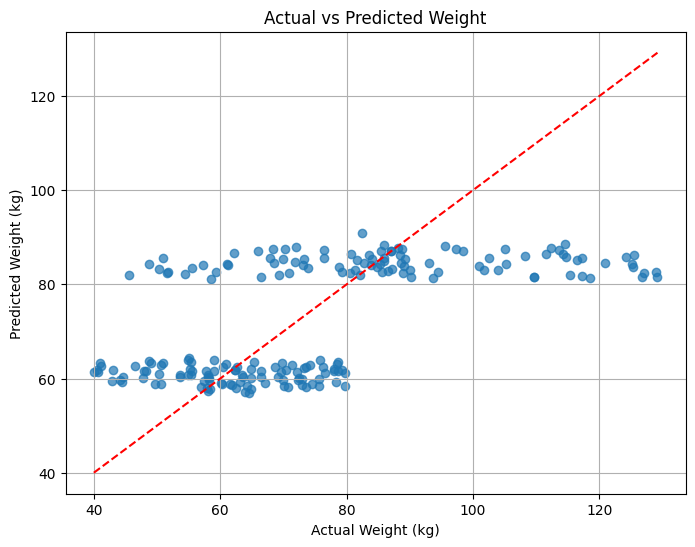

In [13]:
# Step 7: Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Weight (kg)')
plt.ylabel('Predicted Weight (kg)')
plt.title('Actual vs Predicted Weight')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()